In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
raw_df = pd.read_csv("Article_Bias_Fallacy.csv")
raw_df['Bias'].value_counts()

In [ ]:
raw_df.info()

In [ ]:
biased_articles = list(raw_df[raw_df['Bias']==0].sample(10, random_state=42)['Content'])
unbiased_articles = list(raw_df[raw_df['Bias']==1].sample(10, random_state=42)['Content'])

In [ ]:
# If there are any bias type 2, change it to 0
for i in range(len(raw_df)):
  if raw_df['Bias'][i] == int(2):
    raw_df['Bias'][i] = int(0)

In [ ]:
# Importing Necessary Libraries
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [ ]:
nltk.download("wordnet")
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')

In [ ]:
def tokenize(text): # Tokenizing Function
    return [word for word in word_tokenize(text) if word.isalpha()]

In [ ]:
# Initiating Stemming, Lemmatizing and stopwords
stemmer = SnowballStemmer(language = 'english')
lemmatizer = WordNetLemmatizer()
eng_stopwords = stopwords.words("english")

In [ ]:
!pip install sentence-transformers

In [ ]:
# To test the f1 scores with permutational addistion of different features
raw1 = raw_df.drop(['Adhominem'], axis=1)
raw2 = raw_df.drop(['Appeal'], axis=1)
raw3 = raw_df.drop(['Hasty'], axis=1)
raw4 = raw_df.drop(['Adhominem', 'Appeal'], axis=1)
raw5 = raw_df.drop(['Adhominem', 'Hasty'], axis=1)
raw6 = raw_df.drop(['Appeal', 'Hasty'], axis=1)
raw7 = raw_df.drop(['Adhominem', 'Hasty', 'Appeal'], axis=1)

In [ ]:
def real_tokenize(text):
    return [word for word in word_tokenize(text) if word.isalpha()]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer # Tf-idf feature addition
vectorizer = TfidfVectorizer(tokenizer=real_tokenize, stop_words=eng_stopwords, ngram_range=(1, 2), max_features=2000)
from sklearn.utils import shuffle
# new_df = shuffle(sample_df, random_state = 42)
new_df = shuffle(raw_df, random_state = 42)
train_df = new_df[:int(len(new_df)*0.9)] # splitting data in train and test
test_df = new_df[int(len(new_df)*0.9):]

In [ ]:
train_df = train_df.reset_index()
train_df
test_df = test_df.reset_index()
test_df

In [ ]:
vectorizer.fit(train_df.Content.values) # fitting the vectorizer
train_inputs = vectorizer.transform(train_df.Content)
test_inputs = vectorizer.transform(test_df.Content)

In [ ]:
for i in range(len(train_df)):
  train_df['TF-IDF'][i] = sum(train_inputs.toarray()[i])/len(tokenize(train_df['Content'][i])) # Adding Tf-idf features
for i in range(len(test_df)):
  test_df['TF-IDF'][i] = sum(test_inputs.toarray()[i])/len(tokenize(train_df['Content'][i]))

In [ ]:
train_df['Sentiment_Score'] = train_df['Positive Sentiment Measure']-train_df['Negative Sentiment Measure']
test_df['Sentiment_Score'] = test_df['Positive Sentiment Measure']-test_df['Negative Sentiment Measure'] # Only considering sentiment as a feature

In [ ]:
del train_df['Positive Sentiment Measure']
del train_df['Negative Sentiment Measure']
del test_df['Positive Sentiment Measure']
del test_df['Negative Sentiment Measure']

In [ ]:
train_df.info()

In [ ]:
# train1 = train_df.iloc[:, 9]
# test1 = test_df.iloc[:, 9]
train_fallacy = train_df.iloc[:, 24:28] # Only taking fallacy features
test_fallacy = test_df.iloc[:, 24:28]

# train_df = pd.concat([train1, train2], axis=1)
# test_df = pd.concat([test1, test2], axis=1)

In [ ]:
# train1 = train_df.iloc[:, 9]
# test1 = test_df.iloc[:, 9]
train_persuasion = train_df.iloc[:, 23:24] # only taking persuasive features
test_persuasion = test_df.iloc[:, 23:24]

# train_df = pd.concat([train1, train2], axis=1)
# test_df = pd.concat([test1, test2], axis=1)

In [ ]:
# train1 = train_df.iloc[:, 9]
train_args = train_df.iloc[:,20:22] # Only taking arguments features

# test1 = test_df.iloc[:, 9]
test_args = test_df.iloc[:,20:22]

# train_df = pd.concat([train1, train2], axis=1)
# test_df = pd.concat([test1, test2], axis=1)

In [ ]:
# train1 = train_df.iloc[:, 9]
# test1 = test_df.iloc[:, 9]
train_topic = train_df.iloc[:, 16:17] # only topic similarity features
test_topic = test_df.iloc[:, 16:17]

# train_df = pd.concat([train1, train2], axis=1)
# test_df = pd.concat([test1, test2], axis=1)

In [ ]:
# only taking lexical features
train1 = train_df.iloc[:, 10:16]
train2 = train_df.iloc[:, 18:20]
train3 = train_df.iloc[:, 22]
train4 = train_df.iloc[:, 28]

train_lex = pd.concat([train1, train2, train3, train4], axis=1)

test1 = test_df.iloc[:, 10:16]
test2 = test_df.iloc[:, 18:20]
test3 = test_df.iloc[:, 22]
test4 = test_df.iloc[:, 28]

test_lex = pd.concat([test1, test2, test3, test4], axis=1)

In [ ]:
# only taking subective features
train3 = train_df.iloc[:, 17]
train4 = train_df.iloc[:, 29]
train_sub = pd.concat([train3, train4], axis=1)

test3 = test_df.iloc[:, 17]
test4 = test_df.iloc[:, 29]
test_sub = pd.concat([test3, test4], axis=1)

In [ ]:
"""
The following cells depict to get the shap measures of group of features: firstly we need to create the groups by scaling and then doing PCA
"""

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
train_subx = sc.fit_transform(train_sub)
test_subx = sc.transform(test_sub)

train_lexx = sc.fit_transform(train_lex)
test_lexx = sc.transform(test_lex)

train_persuasionx = sc.fit_transform(train_persuasion)
test_persuasionx = sc.transform(test_persuasion)

train_argsx = sc.fit_transform(train_args)
test_argsx = sc.transform(test_args)

train_topicx = sc.fit_transform(train_topic)
test_topicx = sc.transform(test_topic)

train_fallx = sc.fit_transform(train_fallacy)
test_fallx = sc.transform(test_fallacy)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)

pca_sub_train = pca.fit_transform(train_subx)
pca_sub_test = pca.transform(test_subx)

pca_lex_train = pca.fit_transform(train_lexx)
pca_lex_test = pca.transform(test_lexx)

pca_args_train = pca.fit_transform(train_argsx)
pca_args_test = pca.transform(test_argsx)

pca_persuasion_train = pca.fit_transform(train_persuasionx)
pca_persuasion_test = pca.transform(test_persuasionx)

pca_topic_train = pca.fit_transform(train_topicx)
pca_topic_test = pca.transform(test_topicx)

pca_fall_train = pca.fit_transform(train_fallx)
pca_fall_test = pca.transform(test_fallx)

In [ ]:
"""
Then we create Dataframes of train and test from these to get final 6 feature(group feature) based frame
"""

In [ ]:
train_dict = {"Fs": list(pca_sub_train.flatten()), "Fl": list(pca_lex_train.flatten()), "Fp": list(pca_persuasion_train.flatten()), "Fa": list(pca_args_train.flatten()), "Ff": list(pca_fall_train.flatten()), "Ft": list(pca_topic_train.flatten())}
test_dict = {"Fs": list(pca_sub_test.flatten()), "Fl": list(pca_lex_test.flatten()), "Fp": list(pca_persuasion_test.flatten()), "Fa": list(pca_args_test.flatten()), "Ff": list(pca_fall_test.flatten()), "Ft": list(pca_topic_test.flatten())}

In [ ]:
train_in = pd.DataFrame(train_dict)
test_in = pd.DataFrame(test_dict)

In [ ]:
train1 = train_df.iloc[:, 11:]
test1 = test_df.iloc[:, 11:]
raw1 = shuffle(pd.concat([train1, test1], axis = 0), random_state=2023)
raw1.reset_index(inplace=True)

In [ ]:
train_df['Bias'].value_counts()

In [ ]:
# train_in = pd.concat([train_df.iloc[:,12:], train_df.iloc[:,29]], axis=1)
# train_out = train_df.iloc[:, 11]
# test_in = pd.concat([test_df.iloc[:,12:], test_df.iloc[:,29]], axis=1)
# test_out = test_df.iloc[:, 11]
# train_in = train_df.iloc[:, 1:]
train_out = train_df.iloc[:,9] # only taking the outputs
# test_in = test_df.iloc[:, 1:]
test_out = test_df.iloc[:,9]

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

In [ ]:
scaler = StandardScaler()
scaler.fit(train_in.iloc[:, :])

In [ ]:
train_in.iloc[:, :]= scaler.transform(train_in.iloc[:,:])
train_in

In [ ]:
# test_arr = np.array(test_in)
test_in.iloc[:, :] = scaler.transform(test_in.iloc[:,:])
test_in

In [ ]:
"""
Some of these cells are for computing feature based attributes in biased and unbiased articles, you can see the graphs below"
"""
import matplotlib.pyplot as plt

In [ ]:
features = np.array(["WC", "QM", "FK", "GF", "DPL",	"TS",	"PS",	"YK", "TF"])

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
unbiased = raw1[raw1['Bias']==1].drop('Bias', axis = 1)
biased = raw1[raw1['Bias']==0].drop('Bias', axis=1)

In [ ]:
pcafeab = PCA(n_components=1)
pcafeab.fit(np.array(biased))
# pcafeab.components_, pcafeab.explained_variance_ratio_
# np.max(np.maximum(pcafeab.components_[0], pcafeab.components_[1]))
pca_biased = np.square(pcafeab.components_[0])
pca_biased = np.array([pca_biased[0], pca_biased[2], pca_biased[3], pca_biased[4], pca_biased[5], pca_biased[6], pca_biased[11], pca_biased[14], pca_biased[16]])
# pcafeab.explained_variance_ratio_
# pca_biased = np.mean(np.absolute(pcafeab.explained_variance_ratio_), axis=0)

In [ ]:
pcafeaub = PCA(n_components=1)
pcafeaub.fit(np.array(unbiased))
pca_unbiased = np.square(pcafeaub.components_[0])
pca_unbiased = np.array([pca_unbiased[0], pca_unbiased[2], pca_unbiased[3], pca_unbiased[4], pca_unbiased[5], pca_unbiased[6], pca_unbiased[11], pca_unbiased[14], pca_unbiased[16]])
pca_unbiased

In [ ]:
features = train_in.columns.tolist()
vals = {}
for i in range(len(features)):
  vals[features[i]] = {'Biased':pca_biased[i], 'Unbiased':pca_unbiased[i]}

In [ ]:
feature_values = {
    'Biased_Class' : list(pca_biased),
    'Unbiased_Class' : list(pca_unbiased),
}

In [ ]:
x = np.arange(len(features))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in feature_values.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    # ax.bar_label(rects, padding=5)
    multiplier += 1

ax.set_ylabel("Feature Attributes")
ax.set_title("Target Based Feature attributes for Article Dataset")
ax.set_xticks(x+width/2, features)
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, 0.7)

plt.show()

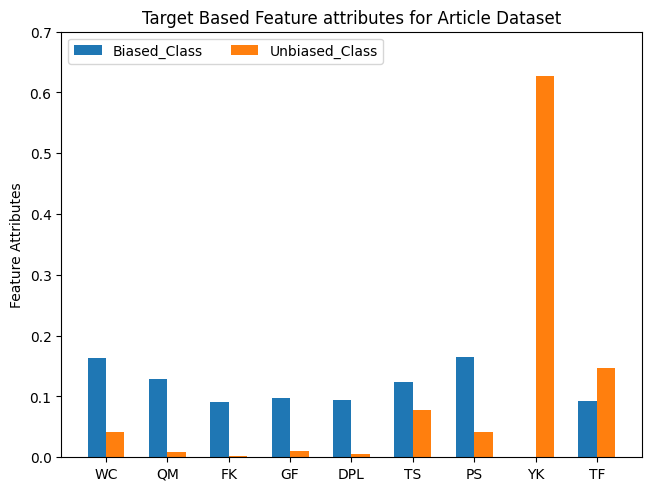

In [ ]:
import matplotlib.pyplot as plt
plt.bar(features, pca_biased)

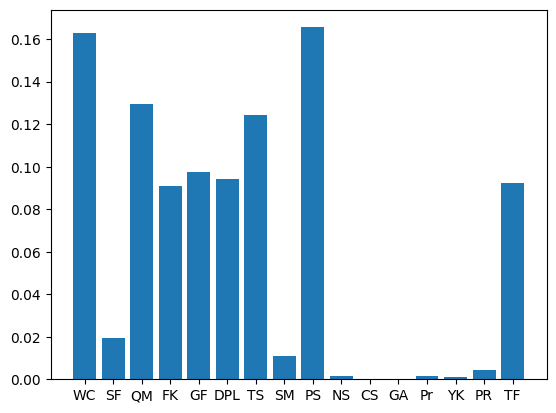

In [ ]:
plt.bar(features, pca_unbiased)

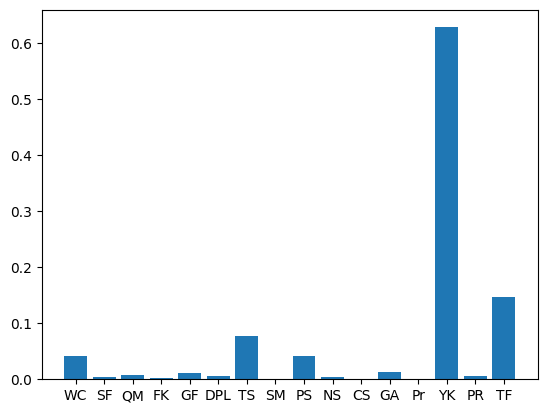

In [ ]:
pca = PCA(n_components=17)
pca.fit(np.array(train_in))
train_in = pca.transform(np.array(train_in))
test_in = pca.transform(np.array(test_in))
pca.explained_variance_ratio_

In [ ]:
"""
These cells are for modelling
"""

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from sklearn.metrics import f1_score, accuracy_score, make_scorer

In [ ]:
k=5
kfold = KFold(n_splits=k, shuffle=True, random_state=42)
scorer = make_scorer(f1_score, average='micro')

In [ ]:
model_LR = LogisticRegression(random_state=42)
model_LR.fit(train_in, train_out)
y_pred = cross_val_predict(model_LR, test_in, test_out, cv=kfold)
scores = cross_val_score(model_LR, test_in, test_out, cv=kfold, scoring=scorer)
f1_scores = f1_score(test_out, y_pred, average=None)
print("Cross-validation micro F1 scores:", scores)
print("Mean F1 score:", scores.mean())
for class_idx, class_score in enumerate(f1_scores):
    print(f"Class {class_idx}: F1 scores - {class_score}")

In [ ]:
model_RF = RandomForestClassifier(n_estimators=150, criterion = 'entropy', random_state=42)
model_RF.fit(train_in, train_out)
y_pred = cross_val_predict(model_RF, test_in, test_out, cv=kfold)
scores = cross_val_score(model_RF, test_in, test_out, cv=kfold, scoring=scorer)
f1_scores = f1_score(test_out, y_pred, average=None)
print("Cross-validation micro F1 scores:", scores)
print("Mean micro F1 score:", scores.mean())
for class_idx, class_score in enumerate(f1_scores):
    print(f"Class {class_idx}: F1 scores - {class_score}")

In [ ]:
model_svc = SVC(kernel='rbf', random_state=42, probability=True)
model_svc.fit(train_in, train_out)
y_pred = cross_val_predict(model_svc, test_in, test_out, cv=kfold)
scores = cross_val_score(model_svc, test_in, test_out, cv=kfold, scoring=scorer)
f1_scores = f1_score(test_out, y_pred, average=None)
print("Cross-validation micro F1 scores:", scores)
print("Mean micro F1 score:", scores.mean())
for class_idx, class_score in enumerate(f1_scores):
    print(f"Class {class_idx}: F1 scores - {class_score}")

In [ ]:
model_xgb = XGBClassifier(random_state=42)
model_xgb.fit(train_in, train_out)
y_pred = cross_val_predict(model_xgb, test_in, test_out, cv=kfold)
scores = cross_val_score(model_xgb, test_in, test_out, cv=kfold, scoring=scorer)
f1_scores = f1_score(test_out, y_pred, average=None)
print("Cross-validation micro F1 scores:", scores)
print("Mean micro F1 score:", scores.mean())
for class_idx, class_score in enumerate(f1_scores):
    print(f"Class {class_idx}: F1 scores - {class_score}")

In [ ]:
"""
THe shap plots
"""

In [ ]:
import shap
explainer = shap.Explainer(model_svc.predict_proba, test_in)
shap_values = explainer(test_in)

In [ ]:
shap_values = shap_values[:,:,0] # For Biased Class
# shap_values = shap_values[:,:,1] # For Unbiased Class

In [ ]:
lst = []
for i in range(len(test_out)):
  if test_out[i]==1:
    lst.append(i)

In [ ]:
shap.summary_plot(shap_values, plot_type='violin')

In [ ]:
shap.plots.beeswarm(shap_values)

In [ ]:
import random
# random_indices = random.sample(range(150), 10)
random_indices = random.sample(lst, 5)
random_indices

In [ ]:
shap.initjs()
shap.plots.force(shap_values[98], show=False, matplotlib=True).savefig("force_biased1.png")
# plt.savefig("force_biased1.png")

In [ ]:
shap.initjs()
shap.plots.force(shap_values[7], show=False, matplotlib=True).savefig("force_biased2.png")


In [ ]:
shap.initjs()
shap.plots.force(shap_values[110], show=False, matplotlib=True).savefig("force_biased3.png")


In [ ]:
shap.initjs()
shap.plots.force(shap_values[148], show=False, matplotlib=True).savefig("force_biased5.png")


In [ ]:
shap.summary_plot(shap_values, test_in)
plt.savefig("shap_beeswarm_plot.svg", format='svg', bbox_inches='tight')
cairosvg.svg2eps(url="shap_beeswarm_plot.svg", write_to="shap_beeswarm_plot.eps")
plt.clf()

In [ ]:
shap.plots.bar(shap_values, max_display=20)

In [ ]:
for x in random_indices:
    shap.plots.waterfall(shap_values[x], max_display=20)

In [ ]:
"""
For Bertopic and Keybert related feature addition, you can use below code to add them.

"""

In [ ]:
!pip install keybert
!pip install keybert[flair]
!pip install keybert[gensim]
!pip install keybert[spacy]
!pip install keybert[use]
!pip install bertopic
!pip install bertopic[flair, gensim, spacy, use]
!pip install tensorflow-probability==0.24.0
!pip install tensorflow-keras

In [ ]:
from keybert import KeyBERT
from bertopic import BERTopic
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download("wordnet")
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
stemmer = SnowballStemmer(language = 'english')
lemmatizer = WordNetLemmatizer()
eng_stopwords = stopwords.words("english")

In [ ]:
import numpy as np
import pandas as pd

article_df = pd.read_csv("/content/Article_Bias_Fallacy.csv")

In [ ]:
biased_doc = article_df[article_df['Bias']==0]['Content']
unbiased_doc = article_df[article_df["Bias"]==1]['Content']

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('bert-base-nli-mean-tokens')

In [ ]:
aux_verbs = {'be', 'am', 'is', 'are', 'was', 'were', 'been', 'being',
             'do', 'does', 'did', 'done', 'doing',
             'have', 'has', 'had', 'having',
             'shall', 'will', 'should', 'would',
             'may', 'might', 'must', 'can', 'could', 'say', 'said', 'tell', 'told', 'says', 'tells'}

In [ ]:
biased_no_stopwords = [' '.join([word for word in doc.split() if word.lower() not in eng_stopwords and word.lower() not in aux_verbs]) for doc in biased_doc]
unbiased_no_stopwords = [' '.join([word for word in doc.split() if word.lower() not in eng_stopwords and word.lower() not in aux_verbs]) for doc in unbiased_doc]

In [ ]:
topic_model = BERTopic(top_n_words=20)
topics, probs = topic_model.fit_transform(unbiased_no_stopwords)

In [ ]:
topic_model.get_topic_info()

In [ ]:
biased_bertopic = topic_model.get_document_info(biased_doc)
unbiased_bertopic = topic_model.get_document_info(unbiased_doc)
biased_topics = list(biased_bertopic.Topic.unique())
unbiased_topics = list(unbiased_bertopic.Topic.unique())

In [ ]:
biased_texts = {}
unbiased_texts = {}

for i in range(len(biased_bertopic)):
  if biased_bertopic['Topic'][i] not in biased_texts.keys():
    biased_texts[biased_bertopic['Topic'][i]] = biased_bertopic['Document'][i]
  else:
    biased_texts[biased_bertopic['Topic'][i]] += "\n\n" + biased_bertopic['Document'][i]

for i in range(len(unbiased_bertopic)):
  if unbiased_bertopic['Topic'][i] not in unbiased_texts.keys():
    unbiased_texts[unbiased_bertopic['Topic'][i]] = unbiased_bertopic['Document'][i]
  else:
    unbiased_texts[unbiased_bertopic['Topic'][i]] += "\n\n" + unbiased_bertopic['Document'][i]

In [ ]:
kw_model = KeyBERT()

In [ ]:
def size2keyphrase(text):
  keys2 = kw_model.extract_keywords(text, keyphrase_ngram_range=(2, 2), stop_words=eng_stopwords, top_n=10)
  return [word[0] for word in keys2], keys2

In [ ]:
def size3keyphrase(text):
  keys3 = kw_model.extract_keywords(text, keyphrase_ngram_range=(3, 3), stop_words=eng_stopwords, top_n=10)
  return [word[0] for word in keys3], keys3

In [ ]:
size2keyphrase(biased_texts[0])

In [ ]:
biased_topics = list(biased_texts.keys())
unbiased_topics = list(unbiased_texts.keys())

biased_2keys = []
unbiased_2keys = []
biased_3keys = []
unbiased_3keys = []

biased_2keys_scores = []
unbiased_2keys_scores = []
biased_3keys_scores = []
unbiased_3keys_scores = []


for i in biased_texts.keys():
  ret = size2keyphrase(biased_texts[i])
  biased_2keys.append(ret[0])
  biased_2keys_scores.append(ret[1])
for i in unbiased_texts.keys():
  ret = size2keyphrase(unbiased_texts[i])
  unbiased_2keys.append(ret[0])
  unbiased_2keys_scores.append(ret[1])
for i in biased_texts.keys():
  ret = size3keyphrase(biased_texts[i])
  biased_3keys.append(ret[0])
  biased_3keys_scores.append(ret[1])
for i in unbiased_texts.keys():
  ret = size3keyphrase(unbiased_texts[i])
  unbiased_3keys.append(ret[0])
  unbiased_3keys_scores.append(ret[1])

In [ ]:
biased_2keys_df = pd.DataFrame({'Topic Id': biased_topics, 'Biased_Size_2_KeyPhrases': biased_2keys, 'Biased_Size_2_Phrase_Scores': biased_2keys_scores})
biased_3keys_df = pd.DataFrame({'Topic Id': biased_topics, 'Biased_Size_3_KeyPhrases': biased_3keys, 'Biased_Size_3_Phrase_Scores': biased_3keys_scores})
unbiased_2keys_df = pd.DataFrame({'Topic Id': unbiased_topics, 'Unbiased_Size_2_KeyPhrases': unbiased_2keys, 'Unbiased_Size_2_Phrase_Scores': unbiased_2keys_scores})
unbiased_3keys_df = pd.DataFrame({'Topic Id': unbiased_topics, 'Unbiased_Size_3_KeyPhrases': unbiased_3keys, 'Unbiased_Size_3_Phrase_Scores': unbiased_3keys_scores})


In [ ]:
biased_2keys_df.to_csv("Biased-KeyPhrases-Size2.csv")
biased_3keys_df.to_csv("Biased-KeyPhrases-Size3.csv")
unbiased_2keys_df.to_csv("Unbiased-KeyPhrases-Size2.csv")
unbiased_3keys_df.to_csv("Unbiased-KeyPhrases-Size3.csv")

In [ ]:
biased_2keys = {int(key): value for key, value in biased_2keys.items()}
biased_3keys = {int(key): value for key, value in biased_3keys.items()}
unbiased_2keys = {int(key): value for key, value in unbiased_2keys.items()}
unbiased_3keys = {int(key): value for key, value in unbiased_3keys.items()}

In [ ]:
import json

with open('biased_size2_keys.json', 'w') as json_file:
    json.dump(biased_2keys, json_file)
with open('biased_size3_keys.json', 'w') as json_file:
    json.dump(biased_3keys, json_file)
with open('unbiased_size2_keys.json', 'w') as json_file:
    json.dump(unbiased_2keys, json_file)
with open('unbiased_size3_keys.json', 'w') as json_file:
    json.dump(unbiased_3keys, json_file)